In [1]:
import os
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import ttest_ind

In [3]:
from config import input_data_folderpath, input_data_xlsx_filepath, input_data_csv_filepath, date_column, date_prefix_list, trained_models_folderpath, \
date_column, ad_platform_list, target_dict, train_size, feature_list, model_dict, save_val_end_points, n_trials_optuna, all_predictions_csv_filepath, \
all_validation_metrics_filepath, all_ranked_products_filepath, all_actual_products_selected_filepath, all_pred_products_selected_filepath, all_ab_test_results_filepath
from data_load import load_data
from data_preprocessing import preprocess_data
from feature_engineering import engineer_features
from model_training import set_train_test_val_size, train_model
from metrics_prediction import predict_metric
from model_revalidation import compute_metrics_by_category
from product_scoring import rank_products
from AB_testing import ab_test_selection

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175402 entries, 0 to 175401
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   date                           175402 non-null  object 
 1   product_id                     175402 non-null  object 
 2   category                       175402 non-null  object 
 3   price                          175402 non-null  float64
 4   sale_price                     46399 non-null   float64
 5   discount_rate                  175402 non-null  float64
 6   product_age                    175402 non-null  int64  
 7   product_status                 175402 non-null  object 
 8   pct_product_variants_in_stock  175402 non-null  float64
 9   meta_product_revenue           175402 non-null  float64
 10  meta_item_quantity_sold        175402 non-null  int64  
 11  meta_product_detail_views      175402 non-null  int64  
 12  meta_quantity_added_to_cart   

In [4]:
input_data_folderpath

'C:\\Users\\Georgi\\2025ML_projects\\ROI_Hunter\\product_ad_scoring_algo\\data\\input'

Preprocessing data...
Feature engineering...
meta_spend
Nulls in meta_spend: 0 (0.00%)
Zeros in meta_spend: 116486 (66.41%)


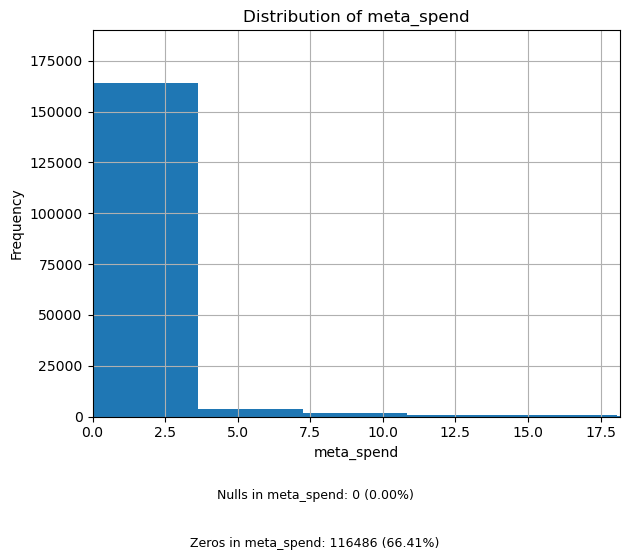

meta_impressions
Nulls in meta_impressions: 0 (0.00%)
Zeros in meta_impressions: 116088 (66.18%)


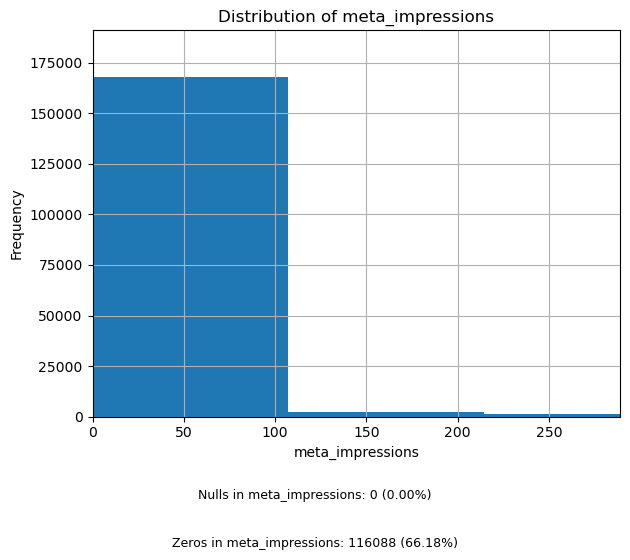

meta_clicks
Nulls in meta_clicks: 0 (0.00%)
Zeros in meta_clicks: 151913 (86.61%)


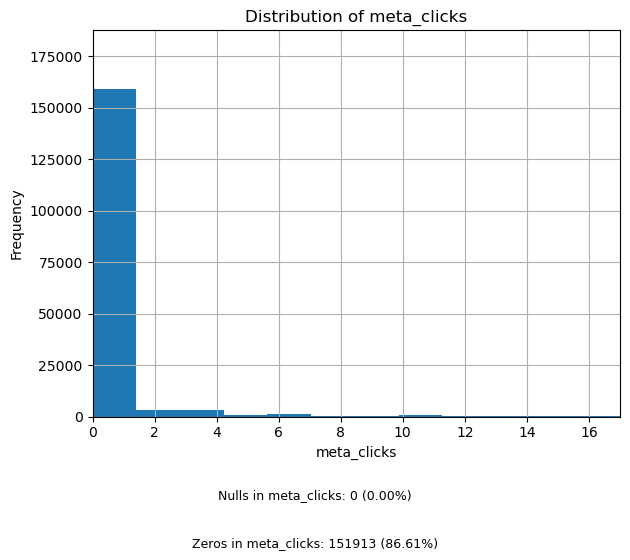

meta_item_quantity_sold
Nulls in meta_item_quantity_sold: 0 (0.00%)
Zeros in meta_item_quantity_sold: 166905 (95.16%)


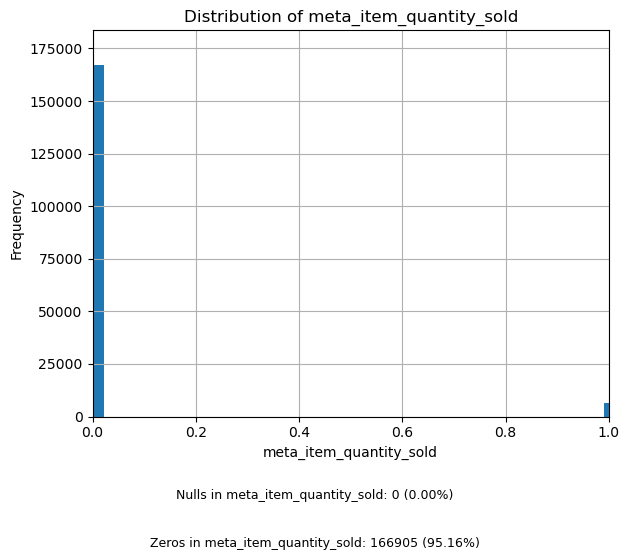

meta_product_revenue
Nulls in meta_product_revenue: 0 (0.00%)
Zeros in meta_product_revenue: 166908 (95.16%)


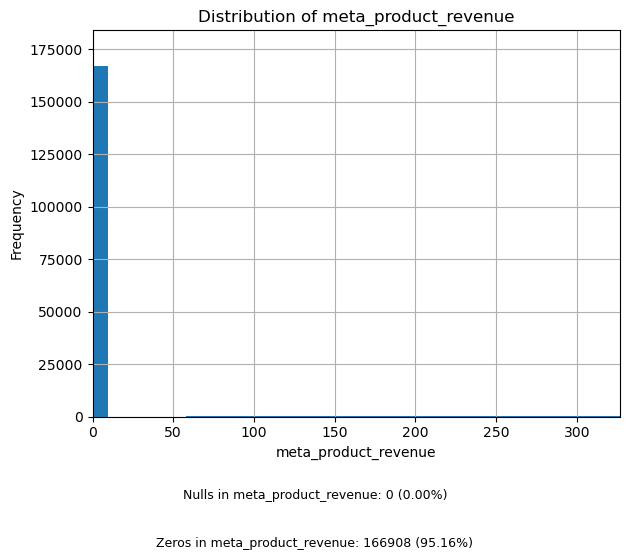

meta_impressions_per_spend
Inf meta_impressions_per_spend before replacement: 398 (0.23%)
meta_clickthrough_per_spend
Inf meta_clickthrough_per_spend before replacement: 4 (0.00%)
meta_conversion_per_spend
Inf meta_conversion_per_spend before replacement: 1856 (1.06%)
meta_roi
Inf meta_roi before replacement: 0 (0.00%)
all_meta_roi
Inf all_meta_roi before replacement: 0 (0.00%)
meta_impressions_per_spend
Inf meta_impressions_per_spend before replacement: 0 (0.00%)
meta_clickthrough_per_spend
Inf meta_clickthrough_per_spend before replacement: 0 (0.00%)
meta_conversion_per_spend
Inf meta_conversion_per_spend before replacement: 0 (0.00%)
meta_roi
Inf meta_roi before replacement: 0 (0.00%)
all_meta_roi
Inf all_meta_roi before replacement: 0 (0.00%)
google_spend
Nulls in google_spend: 0 (0.00%)
Zeros in google_spend: 151452 (86.35%)


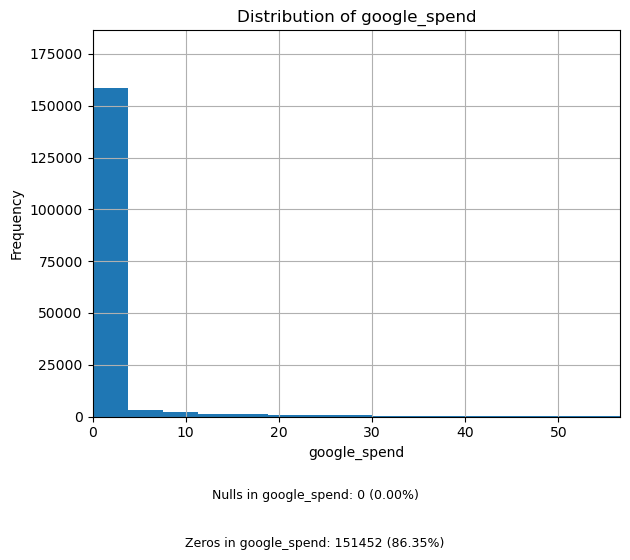

google_impressions
Nulls in google_impressions: 0 (0.00%)
Zeros in google_impressions: 129153 (73.63%)


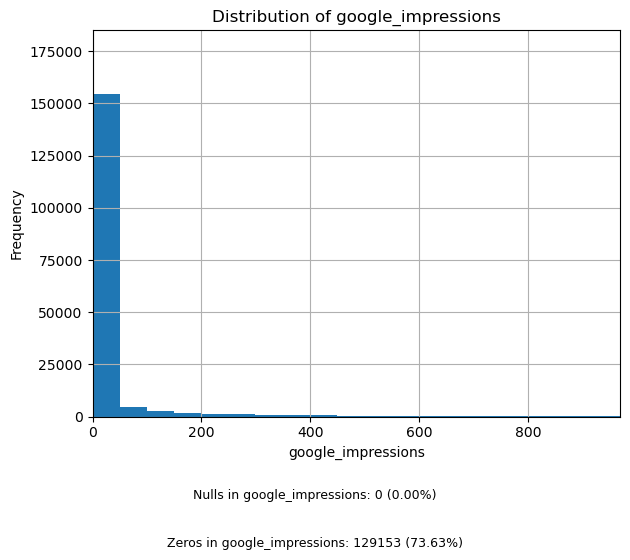

google_clicks
Nulls in google_clicks: 0 (0.00%)
Zeros in google_clicks: 151777 (86.53%)


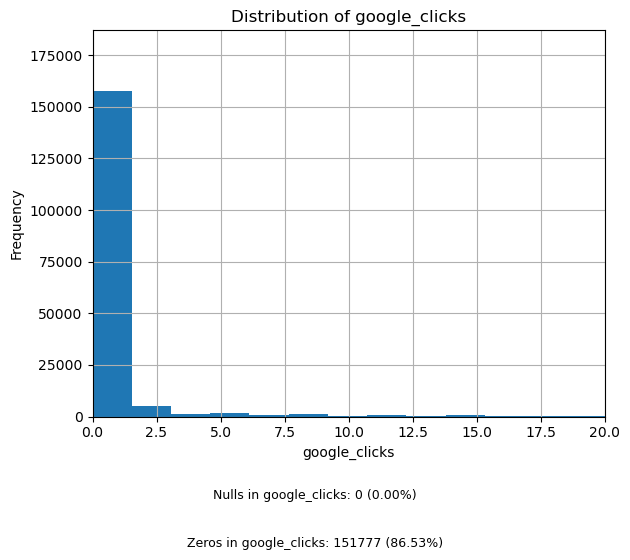

google_item_quantity_sold
Nulls in google_item_quantity_sold: 0 (0.00%)
Zeros in google_item_quantity_sold: 159761 (91.08%)


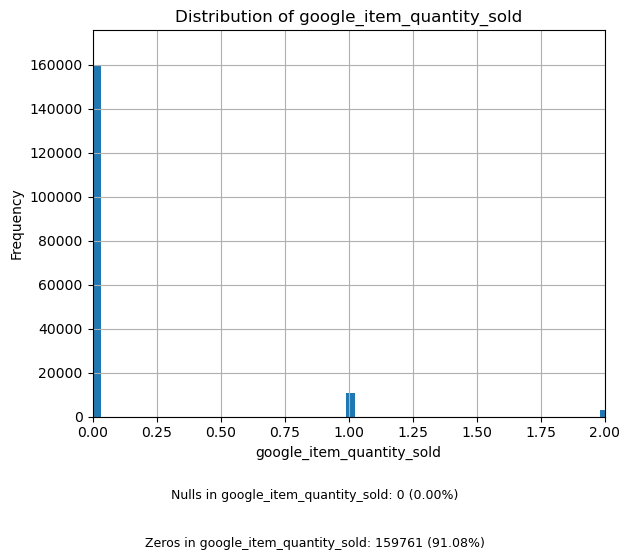

google_product_revenue
Nulls in google_product_revenue: 0 (0.00%)
Zeros in google_product_revenue: 159780 (91.09%)


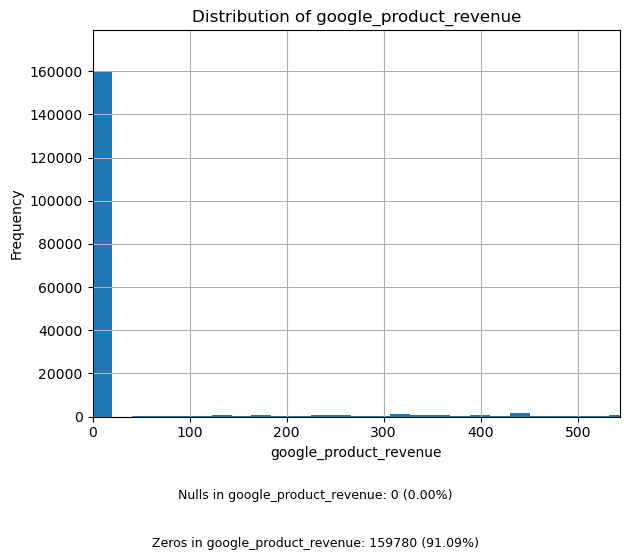

google_impressions_per_spend
Inf google_impressions_per_spend before replacement: 22299 (12.71%)
google_clickthrough_per_spend
Inf google_clickthrough_per_spend before replacement: 3 (0.00%)
google_conversion_per_spend
Inf google_conversion_per_spend before replacement: 7296 (4.16%)
google_roi
Inf google_roi before replacement: 0 (0.00%)
all_google_roi
Inf all_google_roi before replacement: 0 (0.00%)
google_impressions_per_spend
Inf google_impressions_per_spend before replacement: 0 (0.00%)
google_clickthrough_per_spend
Inf google_clickthrough_per_spend before replacement: 0 (0.00%)
google_conversion_per_spend
Inf google_conversion_per_spend before replacement: 0 (0.00%)
google_roi
Inf google_roi before replacement: 0 (0.00%)
all_google_roi
Inf all_google_roi before replacement: 0 (0.00%)
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
Model training...
<class 'pandas.core.frame.DataFrame'>
Index: 9407 entries, 03a4589e-1a21-45a1-92a5-24860fff8b1e to fff05380-fae8-44b2-b2ea-f62969ac

C:\Users\Georgi\2025ML_projects\ROI_Hunter\product_ad_scoring_algo\notebooks\model_training.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = encoders[col].fit_transform(X[col])
C:\Users\Georgi\2025ML_projects\ROI_Hunter\product_ad_scoring_algo\notebooks\model_training.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = encoders[col].fit_transform(X[col])
C:\Users\Georgi\2025ML_projects\ROI_Hunter\product_ad_scoring_algo\notebooks\model_training.py:82: SettingWithCopyWarning: 
A value 

category
sale_price
discount_rate
product_age
product_status
pct_product_variants_in_stock
Optimizing GradientBoosting...


[I 2025-06-27 00:09:31,714] Trial 0 finished with value: 248.2290423657111 and parameters: {'n_estimators': 136, 'learning_rate': 0.06004990360557431, 'max_depth': 7}. Best is trial 0 with value: 248.2290423657111.
C:\Users\Georgi\.conda\envs\ad-score-env\lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
[I 2025-06-27 00:09:51,527] Trial 1 finished with value: 250.33559052711428 and parameters: {'n_estimators': 221, 'learning_rate': 0.07072375542120347, 'max_depth': 7}. Best is trial 0 with value: 248.2290423657111.
C:\Users\Georgi\.conda\envs\ad-score-env\lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or

[I 2025-06-27 00:13:04,952] Trial 16 finished with value: 241.16700371924574 and parameters: {'n_estimators': 215, 'learning_rate': 0.052387970337074985, 'max_depth': 5}. Best is trial 15 with value: 240.75156044622594.
C:\Users\Georgi\.conda\envs\ad-score-env\lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
[I 2025-06-27 00:13:17,560] Trial 17 finished with value: 240.86664416290492 and parameters: {'n_estimators': 213, 'learning_rate': 0.0455281765335224, 'max_depth': 5}. Best is trial 15 with value: 240.75156044622594.
C:\Users\Georgi\.conda\envs\ad-score-env\lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = co

[I 2025-06-27 00:16:09,200] Trial 32 finished with value: 240.96117027115562 and parameters: {'n_estimators': 163, 'learning_rate': 0.05700709763862519, 'max_depth': 5}. Best is trial 24 with value: 240.27998580589838.
C:\Users\Georgi\.conda\envs\ad-score-env\lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
[I 2025-06-27 00:16:20,460] Trial 33 finished with value: 243.1094426361114 and parameters: {'n_estimators': 180, 'learning_rate': 0.03259596756462283, 'max_depth': 5}. Best is trial 24 with value: 240.27998580589838.
C:\Users\Georgi\.conda\envs\ad-score-env\lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

[I 2025-06-27 00:19:12,714] Trial 48 finished with value: 241.28444999292495 and parameters: {'n_estimators': 150, 'learning_rate': 0.04586864149429929, 'max_depth': 6}. Best is trial 24 with value: 240.27998580589838.
C:\Users\Georgi\.conda\envs\ad-score-env\lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
[I 2025-06-27 00:19:22,632] Trial 49 finished with value: 243.1548323454207 and parameters: {'n_estimators': 159, 'learning_rate': 0.03868250886691989, 'max_depth': 5}. Best is trial 24 with value: 240.27998580589838.
C:\Users\Georgi\.conda\envs\ad-score-env\lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

GradientBoosting - Best MSE: 240.74038569198999, R2: 0.0555004655531941, Best Params: {'n_estimators': 156, 'learning_rate': 0.059611633766675734, 'max_depth': 6}
Optimizing RandomForest...


C:\Users\Georgi\.conda\envs\ad-score-env\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[I 2025-06-27 00:19:41,655] Trial 0 finished with value: 248.76150043476574 and parameters: {'n_estimators': 190, 'max_depth': 5, 'min_samples_split': 10}. Best is trial 0 with value: 248.76150043476574.
C:\Users\Georgi\.conda\envs\ad-score-env\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[I 2025-06-27 00:19:50,877] Trial 1 finished with value: 248.59212951860775 and parameters: {'n_estimators': 225, 'max_depth': 5, 'min_samples_split': 2}. Best is trial 1 with value: 248.59212951860775.
C:\Users\Georgi\.conda\en

C:\Users\Georgi\.conda\envs\ad-score-env\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[I 2025-06-27 00:24:59,406] Trial 17 finished with value: 243.06878693794238 and parameters: {'n_estimators': 270, 'max_depth': 10, 'min_samples_split': 6}. Best is trial 15 with value: 242.36587065714946.
C:\Users\Georgi\.conda\envs\ad-score-env\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[I 2025-06-27 00:25:24,978] Trial 18 finished with value: 244.1110024514953 and parameters: {'n_estimators': 300, 'max_depth': 10, 'min_samples_split': 4}. Best is trial 15 with value: 242.36587065714946.
C:\Users\Georgi\.cond

C:\Users\Georgi\.conda\envs\ad-score-env\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[I 2025-06-27 00:31:04,434] Trial 34 finished with value: 243.05119506728076 and parameters: {'n_estimators': 225, 'max_depth': 10, 'min_samples_split': 7}. Best is trial 21 with value: 241.67640702204835.
C:\Users\Georgi\.conda\envs\ad-score-env\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[I 2025-06-27 00:31:20,487] Trial 35 finished with value: 241.7703556904537 and parameters: {'n_estimators': 202, 'max_depth': 10, 'min_samples_split': 10}. Best is trial 21 with value: 241.67640702204835.
C:\Users\Georgi\.con

RandomForest - Best MSE: 241.8279490885124, R2: 0.05123361552408823, Best Params: {'n_estimators': 182, 'max_depth': 10, 'min_samples_split': 10}
Optimizing HistGradientBoosting...


C:\Users\Georgi\.conda\envs\ad-score-env\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[I 2025-06-27 00:34:27,446] Trial 0 finished with value: 246.05545439643288 and parameters: {'learning_rate': 0.06999923632577171, 'max_iter': 130, 'max_depth': 3}. Best is trial 0 with value: 246.05545439643288.
C:\Users\Georgi\.conda\envs\ad-score-env\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[I 2025-06-27 00:34:28,575] Trial 1 finished with value: 239.90547765244122 and parameters: {'learning_rate': 0.0461518650113143, 'max_iter': 255, 'max_depth': 5}. Best is trial 1 with value: 239.90547765244122.
C:\Users\Ge

[I 2025-06-27 00:34:39,704] Trial 16 finished with value: 238.51548917182532 and parameters: {'learning_rate': 0.03163647438728728, 'max_iter': 197, 'max_depth': None}. Best is trial 6 with value: 236.95813683853225.
C:\Users\Georgi\.conda\envs\ad-score-env\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[I 2025-06-27 00:34:40,492] Trial 17 finished with value: 240.00560298371258 and parameters: {'learning_rate': 0.05124424825215675, 'max_iter': 293, 'max_depth': None}. Best is trial 6 with value: 236.95813683853225.
C:\Users\Georgi\.conda\envs\ad-score-env\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[I

[I 2025-06-27 00:34:51,003] Trial 33 finished with value: 242.48311477157392 and parameters: {'learning_rate': 0.031266590189824583, 'max_iter': 151, 'max_depth': None}. Best is trial 6 with value: 236.95813683853225.
C:\Users\Georgi\.conda\envs\ad-score-env\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[I 2025-06-27 00:34:51,664] Trial 34 finished with value: 241.8569117497885 and parameters: {'learning_rate': 0.05128923619977989, 'max_iter': 239, 'max_depth': 5}. Best is trial 6 with value: 236.95813683853225.
C:\Users\Georgi\.conda\envs\ad-score-env\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[I 20

[I 2025-06-27 00:35:02,059] A new study created in memory with name: no-name-e032bf72-ac7f-498b-bd12-c9fb845a14f4


HistGradientBoosting - Best MSE: 240.80498601319167, R2: 0.055247018367236, Best Params: {'learning_rate': 0.04545732770864138, 'max_iter': 210, 'max_depth': None}
Optimizing ExtraTrees...


C:\Users\Georgi\.conda\envs\ad-score-env\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[I 2025-06-27 00:35:05,718] Trial 0 finished with value: 251.3775085254534 and parameters: {'n_estimators': 148, 'max_depth': 5, 'min_samples_split': 9}. Best is trial 0 with value: 251.3775085254534.
C:\Users\Georgi\.conda\envs\ad-score-env\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[I 2025-06-27 00:35:33,030] Trial 1 finished with value: 278.5941626072296 and parameters: {'n_estimators': 242, 'max_depth': None, 'min_samples_split': 5}. Best is trial 0 with value: 251.3775085254534.
C:\Users\Georgi\.conda\envs

C:\Users\Georgi\.conda\envs\ad-score-env\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[I 2025-06-27 00:37:58,435] Trial 17 finished with value: 249.27484655416092 and parameters: {'n_estimators': 182, 'max_depth': 10, 'min_samples_split': 10}. Best is trial 12 with value: 249.07682660638739.
C:\Users\Georgi\.conda\envs\ad-score-env\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[I 2025-06-27 00:38:05,857] Trial 18 finished with value: 249.70260621601344 and parameters: {'n_estimators': 155, 'max_depth': 10, 'min_samples_split': 8}. Best is trial 12 with value: 249.07682660638739.
C:\Users\Georgi\.co

C:\Users\Georgi\.conda\envs\ad-score-env\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[I 2025-06-27 00:40:05,117] Trial 34 finished with value: 249.02094102251226 and parameters: {'n_estimators': 133, 'max_depth': 10, 'min_samples_split': 10}. Best is trial 24 with value: 248.64949596440894.
C:\Users\Georgi\.conda\envs\ad-score-env\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[I 2025-06-27 00:40:15,815] Trial 35 finished with value: 249.579307524487 and parameters: {'n_estimators': 224, 'max_depth': 10, 'min_samples_split': 8}. Best is trial 24 with value: 248.64949596440894.
C:\Users\Georgi\.cond

ExtraTrees - Best MSE: 249.278206782692, R2: 0.02200393350196006, Best Params: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 10}
Optimizing AdaBoost...


C:\Users\Georgi\.conda\envs\ad-score-env\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[I 2025-06-27 00:42:28,618] Trial 0 finished with value: 579.773465572094 and parameters: {'n_estimators': 158, 'learning_rate': 0.09537115523069077}. Best is trial 0 with value: 579.773465572094.
C:\Users\Georgi\.conda\envs\ad-score-env\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[I 2025-06-27 00:42:31,489] Trial 1 finished with value: 268.276079633676 and parameters: {'n_estimators': 51, 'learning_rate': 0.07210368688302117}. Best is trial 1 with value: 268.276079633676.
C:\Users\Georgi\.conda\envs\ad-score-env\li

C:\Users\Georgi\.conda\envs\ad-score-env\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[I 2025-06-27 00:43:53,872] Trial 17 finished with value: 260.84178503040897 and parameters: {'n_estimators': 77, 'learning_rate': 0.021075342094718834}. Best is trial 7 with value: 251.51760651774444.
C:\Users\Georgi\.conda\envs\ad-score-env\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[I 2025-06-27 00:43:57,822] Trial 18 finished with value: 274.9657391583257 and parameters: {'n_estimators': 73, 'learning_rate': 0.061837407297447716}. Best is trial 7 with value: 251.51760651774444.
C:\Users\Georgi\.conda\envs\ad-sc

C:\Users\Georgi\.conda\envs\ad-score-env\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[I 2025-06-27 00:45:25,652] Trial 34 finished with value: 268.01508102576383 and parameters: {'n_estimators': 63, 'learning_rate': 0.04473848940448809}. Best is trial 7 with value: 251.51760651774444.
C:\Users\Georgi\.conda\envs\ad-score-env\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[I 2025-06-27 00:45:30,447] Trial 35 finished with value: 266.58578456244425 and parameters: {'n_estimators': 86, 'learning_rate': 0.028270834976203522}. Best is trial 7 with value: 251.51760651774444.
C:\Users\Georgi\.conda\envs\ad-sc

[I 2025-06-27 00:46:33,569] Trial 1 finished with value: 252.73680287432754 and parameters: {}. Best is trial 0 with value: 252.73680287432754.
[I 2025-06-27 00:46:33,608] Trial 2 finished with value: 252.73680287432754 and parameters: {}. Best is trial 0 with value: 252.73680287432754.
[I 2025-06-27 00:46:33,647] Trial 3 finished with value: 252.73680287432754 and parameters: {}. Best is trial 0 with value: 252.73680287432754.
[I 2025-06-27 00:46:33,679] Trial 4 finished with value: 252.73680287432754 and parameters: {}. Best is trial 0 with value: 252.73680287432754.


AdaBoost - Best MSE: 251.83245776021556, R2: 0.011982811153930406, Best Params: {'n_estimators': 54, 'learning_rate': 0.01370931524484224}
Optimizing LinearRegression...


[I 2025-06-27 00:46:33,719] Trial 5 finished with value: 252.73680287432754 and parameters: {}. Best is trial 0 with value: 252.73680287432754.
[I 2025-06-27 00:46:33,751] Trial 6 finished with value: 252.73680287432754 and parameters: {}. Best is trial 0 with value: 252.73680287432754.
[I 2025-06-27 00:46:33,787] Trial 7 finished with value: 252.73680287432754 and parameters: {}. Best is trial 0 with value: 252.73680287432754.
[I 2025-06-27 00:46:33,822] Trial 8 finished with value: 252.73680287432754 and parameters: {}. Best is trial 0 with value: 252.73680287432754.
[I 2025-06-27 00:46:33,857] Trial 9 finished with value: 252.73680287432754 and parameters: {}. Best is trial 0 with value: 252.73680287432754.
[I 2025-06-27 00:46:33,899] Trial 10 finished with value: 252.73680287432754 and parameters: {}. Best is trial 0 with value: 252.73680287432754.
[I 2025-06-27 00:46:33,931] Trial 11 finished with value: 252.73680287432754 and parameters: {}. Best is trial 0 with value: 252.736802

LinearRegression - Best MSE: 252.73680287432754, R2: 0.008434783527394796, Best Params: {}
Optimizing DecisionTree...


[I 2025-06-27 00:46:35,756] Trial 0 finished with value: 492.73790917761187 and parameters: {'max_depth': None}. Best is trial 0 with value: 492.73790917761187.
[I 2025-06-27 00:46:36,036] Trial 1 finished with value: 489.20174256502327 and parameters: {'max_depth': None}. Best is trial 1 with value: 489.20174256502327.
[I 2025-06-27 00:46:36,345] Trial 2 finished with value: 492.13526826472565 and parameters: {'max_depth': None}. Best is trial 1 with value: 489.20174256502327.
[I 2025-06-27 00:46:36,451] Trial 3 finished with value: 290.0372381393379 and parameters: {'max_depth': 10}. Best is trial 3 with value: 290.0372381393379.
[I 2025-06-27 00:46:36,558] Trial 4 finished with value: 289.7754060035653 and parameters: {'max_depth': 10}. Best is trial 4 with value: 289.7754060035653.
[I 2025-06-27 00:46:36,857] Trial 5 finished with value: 483.75909308245133 and parameters: {'max_depth': None}. Best is trial 4 with value: 289.7754060035653.
[I 2025-06-27 00:46:36,964] Trial 6 finishe

DecisionTree - Best MSE: 251.83270460254624, R2: 0.011981842714564706, Best Params: {'max_depth': 5}
Optimizing KNeighbors...


[I 2025-06-27 00:46:42,546] Trial 0 finished with value: 290.3590020499063 and parameters: {'n_neighbors': 7}. Best is trial 0 with value: 290.3590020499063.
[I 2025-06-27 00:46:43,694] Trial 1 finished with value: 295.4996155948401 and parameters: {'n_neighbors': 6}. Best is trial 0 with value: 290.3590020499063.
[I 2025-06-27 00:46:44,817] Trial 2 finished with value: 312.6862076353587 and parameters: {'n_neighbors': 4}. Best is trial 0 with value: 290.3590020499063.
[I 2025-06-27 00:46:45,931] Trial 3 finished with value: 312.6862076353587 and parameters: {'n_neighbors': 4}. Best is trial 0 with value: 290.3590020499063.
[I 2025-06-27 00:46:47,054] Trial 4 finished with value: 295.4996155948401 and parameters: {'n_neighbors': 6}. Best is trial 0 with value: 290.3590020499063.
[I 2025-06-27 00:46:48,174] Trial 5 finished with value: 290.3590020499063 and parameters: {'n_neighbors': 7}. Best is trial 0 with value: 290.3590020499063.
[I 2025-06-27 00:46:49,252] Trial 6 finished with va

KNeighbors - Best MSE: 290.3590020499063, R2: -0.13916882483295123, Best Params: {'n_neighbors': 7}

Top 3 Models:
GradientBoosting: MSE = 240.74038569198999, R2 = 0.0555004655531941
HistGradientBoosting: MSE = 240.80498601319167, R2 = 0.055247018367236
RandomForest: MSE = 241.8279490885124, R2 = 0.05123361552408823

Ensemble Weights:
GradientBoosting: 0.3426354416874673
HistGradientBoosting: 0.3410707703349006
RandomForest: 0.31629378797763213
Metrics prediction...
Model training...
<class 'pandas.core.frame.DataFrame'>
Index: 9407 entries, 03a4589e-1a21-45a1-92a5-24860fff8b1e to fff05380-fae8-44b2-b2ea-f62969ac5706
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   category                       9407 non-null   object        
 1   sale_price                     9407 non-null   float64       
 2   discount_rate                  9407 non-null   float64       
 3   pro

C:\Users\Georgi\2025ML_projects\ROI_Hunter\product_ad_scoring_algo\notebooks\model_training.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = encoders[col].fit_transform(X[col])
C:\Users\Georgi\2025ML_projects\ROI_Hunter\product_ad_scoring_algo\notebooks\model_training.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = encoders[col].fit_transform(X[col])
C:\Users\Georgi\2025ML_projects\ROI_Hunter\product_ad_scoring_algo\notebooks\model_training.py:82: SettingWithCopyWarning: 
A value 

Optimizing GradientBoosting...


[I 2025-06-27 00:47:52,150] Trial 0 finished with value: 746863964.2006577 and parameters: {'n_estimators': 140, 'learning_rate': 0.07441343941236565, 'max_depth': 4}. Best is trial 0 with value: 746863964.2006577.
C:\Users\Georgi\.conda\envs\ad-score-env\lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
[I 2025-06-27 00:48:00,796] Trial 1 finished with value: 753953446.5271981 and parameters: {'n_estimators': 130, 'learning_rate': 0.08624331929062017, 'max_depth': 6}. Best is trial 0 with value: 746863964.2006577.
C:\Users\Georgi\.conda\envs\ad-score-env\lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_

[I 2025-06-27 00:50:21,722] Trial 16 finished with value: 747252004.448442 and parameters: {'n_estimators': 199, 'learning_rate': 0.012019737153951361, 'max_depth': 4}. Best is trial 15 with value: 742737790.9611462.
C:\Users\Georgi\.conda\envs\ad-score-env\lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
[I 2025-06-27 00:50:26,769] Trial 17 finished with value: 743868607.6797045 and parameters: {'n_estimators': 164, 'learning_rate': 0.058528477494199246, 'max_depth': 3}. Best is trial 15 with value: 742737790.9611462.
C:\Users\Georgi\.conda\envs\ad-score-env\lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = colum

[I 2025-06-27 00:52:17,192] Trial 32 finished with value: 742801380.9283007 and parameters: {'n_estimators': 208, 'learning_rate': 0.06927411185561275, 'max_depth': 3}. Best is trial 31 with value: 742232480.6156007.
C:\Users\Georgi\.conda\envs\ad-score-env\lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
[I 2025-06-27 00:52:23,121] Trial 33 finished with value: 743113157.4900943 and parameters: {'n_estimators': 194, 'learning_rate': 0.08211911626084123, 'max_depth': 3}. Best is trial 31 with value: 742232480.6156007.
C:\Users\Georgi\.conda\envs\ad-score-env\lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column

[I 2025-06-27 00:54:18,991] Trial 48 finished with value: 743061351.2643963 and parameters: {'n_estimators': 228, 'learning_rate': 0.05346646112131441, 'max_depth': 3}. Best is trial 31 with value: 742232480.6156007.
C:\Users\Georgi\.conda\envs\ad-score-env\lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
[I 2025-06-27 00:54:29,930] Trial 49 finished with value: 746275946.9057775 and parameters: {'n_estimators': 274, 'learning_rate': 0.059822599631502923, 'max_depth': 4}. Best is trial 31 with value: 742232480.6156007.
C:\Users\Georgi\.conda\envs\ad-score-env\lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = colum

GradientBoosting - Best MSE: 742232480.6156007, R2: 0.015252123411000684, Best Params: {'n_estimators': 209, 'learning_rate': 0.06897371811305546, 'max_depth': 3}
Optimizing RandomForest...


C:\Users\Georgi\.conda\envs\ad-score-env\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[I 2025-06-27 00:54:43,629] Trial 0 finished with value: 746821299.5603719 and parameters: {'n_estimators': 217, 'max_depth': 5, 'min_samples_split': 2}. Best is trial 0 with value: 746821299.5603719.
C:\Users\Georgi\.conda\envs\ad-score-env\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[I 2025-06-27 00:54:51,359] Trial 1 finished with value: 748916416.0885206 and parameters: {'n_estimators': 119, 'max_depth': 10, 'min_samples_split': 3}. Best is trial 0 with value: 746821299.5603719.
C:\Users\Georgi\.conda\envs\a

C:\Users\Georgi\.conda\envs\ad-score-env\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[I 2025-06-27 00:58:45,557] Trial 17 finished with value: 746347247.345968 and parameters: {'n_estimators': 191, 'max_depth': 10, 'min_samples_split': 10}. Best is trial 15 with value: 745397243.6544411.
C:\Users\Georgi\.conda\envs\ad-score-env\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[I 2025-06-27 00:59:04,633] Trial 18 finished with value: 747105842.694654 and parameters: {'n_estimators': 293, 'max_depth': 10, 'min_samples_split': 8}. Best is trial 15 with value: 745397243.6544411.
C:\Users\Georgi\.conda\en

C:\Users\Georgi\.conda\envs\ad-score-env\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[I 2025-06-27 01:03:33,800] Trial 34 finished with value: 745474139.6819353 and parameters: {'n_estimators': 279, 'max_depth': 10, 'min_samples_split': 10}. Best is trial 26 with value: 744882939.7380849.
C:\Users\Georgi\.conda\envs\ad-score-env\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[I 2025-06-27 01:03:49,246] Trial 35 finished with value: 745347812.0264982 and parameters: {'n_estimators': 235, 'max_depth': 10, 'min_samples_split': 9}. Best is trial 26 with value: 744882939.7380849.
C:\Users\Georgi\.conda\

RandomForest - Best MSE: 745445146.8625768, R2: 0.010989757713564585, Best Params: {'n_estimators': 198, 'max_depth': 10, 'min_samples_split': 10}
Optimizing HistGradientBoosting...


C:\Users\Georgi\.conda\envs\ad-score-env\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[I 2025-06-27 01:07:42,810] Trial 0 finished with value: 743935560.7929119 and parameters: {'learning_rate': 0.016310500838715183, 'max_iter': 225, 'max_depth': None}. Best is trial 0 with value: 743935560.7929119.
C:\Users\Georgi\.conda\envs\ad-score-env\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[I 2025-06-27 01:07:42,987] Trial 1 finished with value: 746341102.697414 and parameters: {'learning_rate': 0.042039818107657376, 'max_iter': 202, 'max_depth': 5}. Best is trial 0 with value: 743935560.7929119.
C:\Users\G

[I 2025-06-27 01:07:50,413] Trial 16 finished with value: 743038717.8781064 and parameters: {'learning_rate': 0.04345643597072474, 'max_iter': 209, 'max_depth': 3}. Best is trial 16 with value: 743038717.8781064.
C:\Users\Georgi\.conda\envs\ad-score-env\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[I 2025-06-27 01:07:50,828] Trial 17 finished with value: 744874118.7331005 and parameters: {'learning_rate': 0.04697257383228013, 'max_iter': 151, 'max_depth': 3}. Best is trial 16 with value: 743038717.8781064.
C:\Users\Georgi\.conda\envs\ad-score-env\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[I 2025-06

C:\Users\Georgi\.conda\envs\ad-score-env\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[I 2025-06-27 01:07:56,857] Trial 34 finished with value: 748211715.178811 and parameters: {'learning_rate': 0.07285508675194027, 'max_iter': 193, 'max_depth': 3}. Best is trial 18 with value: 741550225.7941827.
C:\Users\Georgi\.conda\envs\ad-score-env\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[I 2025-06-27 01:07:57,275] Trial 35 finished with value: 745047372.2831953 and parameters: {'learning_rate': 0.058232520477444503, 'max_iter': 146, 'max_depth': 5}. Best is trial 18 with value: 741550225.7941827.
C:\Users\G

[I 2025-06-27 01:08:02,850] A new study created in memory with name: no-name-3686086d-085d-48c1-9068-8c0b1425f1fc


HistGradientBoosting - Best MSE: 742479924.8614076, R2: 0.014923829780640552, Best Params: {'learning_rate': 0.07595077519692345, 'max_iter': 240, 'max_depth': 3}
Optimizing ExtraTrees...


C:\Users\Georgi\.conda\envs\ad-score-env\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[I 2025-06-27 01:08:29,375] Trial 0 finished with value: 775229822.0109644 and parameters: {'n_estimators': 248, 'max_depth': None, 'min_samples_split': 6}. Best is trial 0 with value: 775229822.0109644.
C:\Users\Georgi\.conda\envs\ad-score-env\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[I 2025-06-27 01:08:38,027] Trial 1 finished with value: 749575997.6144694 and parameters: {'n_estimators': 184, 'max_depth': 10, 'min_samples_split': 7}. Best is trial 1 with value: 749575997.6144694.
C:\Users\Georgi\.conda\env

[W 2025-06-27 06:26:21,604] Trial 13 failed with value None.


KeyboardInterrupt: 

In [5]:
# load_data(input_data_xlsx_filepath, input_data_csv_filepath)
input_df = pd.read_csv(input_data_csv_filepath)
input_df.set_index('product_id', inplace=True)
print('Preprocessing data...')
preprocessed_df = preprocess_data(input_df, date_column)
print('Feature engineering...')
featured_df = engineer_features(preprocessed_df, date_column, date_prefix_list, ad_platform_list, input_data_folderpath)
val_first_day, val_last_day, val_last_day_str = save_val_end_points(featured_df.copy())

dummy_columns = [col for col in featured_df.columns if any(col.startswith(prefix) for prefix in date_prefix_list)]
features = feature_list + dummy_columns

predictions_df_list = []
for ad_platform in ad_platform_list:
    for target in target_dict[ad_platform]:            
        print('Model training...')
        orig_X_val, orig_y_val = set_train_test_val_size(featured_df, val_first_day, val_last_day, train_size, ad_platform, target, features, 
                                                         date_column, date_prefix_list, 
                                                         dummy_columns, encoding=False)        
        X_train, X_test, X_val, y_train, y_test, y_val, encoders, scalers = set_train_test_val_size(featured_df, val_first_day, 
                                                                                                    val_last_day, train_size, 
                                                                                                    ad_platform, target, features, 
                                                                                                    date_column, date_prefix_list, 
                                                                                                    dummy_columns, encoding=True)
        train_model(featured_df, ad_platform, target, features, val_last_day_str, 
                    trained_models_folderpath, X_train, X_test, y_train, y_test, X_val, y_val, encoders, scalers, model_dict, 
                    n_trials_optuna)
        print('Metrics prediction...')
        prediction_df = predict_metric(trained_models_folderpath, val_last_day_str, X_val, y_val, orig_X_val, target, ad_platform, model_dict)
        predictions_df_list.append(prediction_df)

all_predictions_df = pd.concat(predictions_df_list)
all_predictions_df.to_csv(all_predictions_csv_filepath, index=True)

print('Model Validation...')
metrics_df = compute_metrics_by_category(all_predictions_df, all_validation_metrics_filepath)

print('Product Scoring...')
all_ranked_products_df = rank_products(all_predictions_df, metrics_df, all_ranked_products_filepath)

print('AB testing...')
all_actual_products_selected_df, all_pred_products_selected_df, all_ab_test_results_df = ab_test_selection(all_ranked_products_df, all_predictions_df,\
                                                                                                           all_actual_products_selected_filepath, \
                                                                                                           all_pred_products_selected_filepath, \
                                                                                                           all_ab_test_results_filepath)

In [ ]:
# all_actual_products_selected_df = all_actual_products_selected_df.drop_duplicates()
# all_pred_products_selected_df = all_pred_products_selected_df.drop_duplicates()
# all_actual_products_selected_df.to_csv(all_actual_products_selected_filepath, index=False)
# all_pred_products_selected_df.to_csv(all_pred_products_selected_filepath, index=False)

In [ ]:
# metrics_df = compute_metrics_by_category(all_predictions_df, all_validation_metrics_filepath)

In [ ]:
# metrics_df

In [ ]:
# all_ranked_products_df = rank_products(all_predictions_df, metrics_df, all_ranked_products_filepath)

In [ ]:
# all_actual_products_selected_df, all_pred_products_selected_df, all_ab_test_results_df = ab_test_selection(all_ranked_products_df, all_predictions_df,\
#                                                                                                            all_actual_products_selected_filepath, \
#                                                                                                            all_pred_products_selected_filepath, \
#                                                                                                            all_ab_test_results_filepath)